<a href="https://colab.research.google.com/github/petrakov1/itmo-geter-data/blob/main/task2_and_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




# Yolo test


In [1]:
!wget https://pjreddie.com/media/files/yolov3.weights
!git clone https://github.com/pjreddie/darknet

--2021-05-16 18:36:31--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  45.6MB/s    in 5.5s    

2021-05-16 18:36:37 (42.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

Cloning into 'darknet'...
remote: Enumerating objects: 5934, done.
remote: Total 5934 (delta 0), reused 0 (delta 0), pack-reused 5934
Receiving objects: 100% (5934/5934), 6.35 MiB | 31.09 MiB/s, done.
Resolving deltas: 100% (3926/3926), done.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
classes = None
with open('/content/darknet/data/coco.names', 'r') as f:
 classes = [line.strip() for line in f.readlines()]


In [5]:
net = cv2.dnn.readNet('/content/yolov3.weights', '/content/darknet/cfg/yolov3.cfg')

net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)

In [13]:
def recognise_humans(image):
  net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))
  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  outs = net.forward(output_layers)
  class_ids = []
  confidences = []
  boxes = []
  Width = image.shape[1]
  Height = image.shape[0]
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.1:
              center_x = int(detection[0] * Width)
              center_y = int(detection[1] * Height)
              w = int(detection[2] * Width)
              h = int(detection[3] * Height)
              x = center_x - w / 2
              y = center_y - h / 2
              class_ids.append(class_id)
              confidences.append(float(confidence))
              boxes.append([x, y, w, h])
  indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.2)
  image_to_show = image.copy();
  human_count = 0
  #check if is people detection
  for i in indices:
      i = i[0]
      box = boxes[i]
      if class_ids[i]==0:
          label = str(classes[class_id])
          human_count+=1
          cv2.rectangle(image_to_show, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (255, 100, 255), 2)
          cv2.putText(image_to_show, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 100, 255), 2)
  # plt.imshow(image)
  # image_to_show = cv2.cvtColor(image_to_show, cv2.COLOR_RGB2BGR)
  cv2_imshow(image_to_show)
  display("Людей на фото: " + str(human_count))

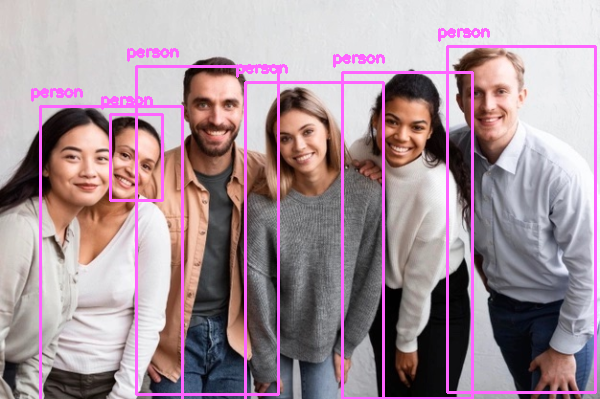

'Людей на фото: 6'

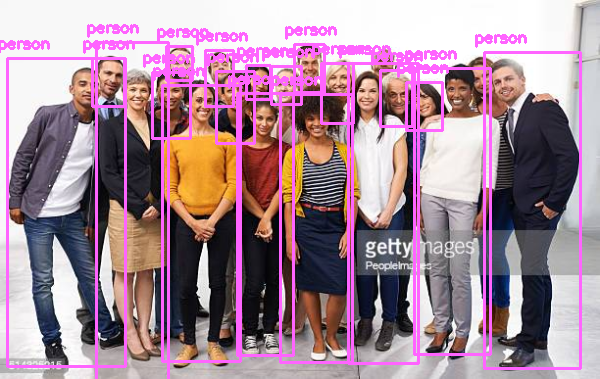

'Людей на фото: 19'

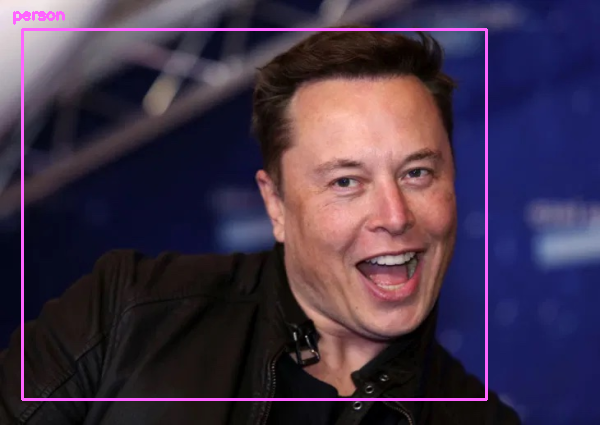

'Людей на фото: 1'

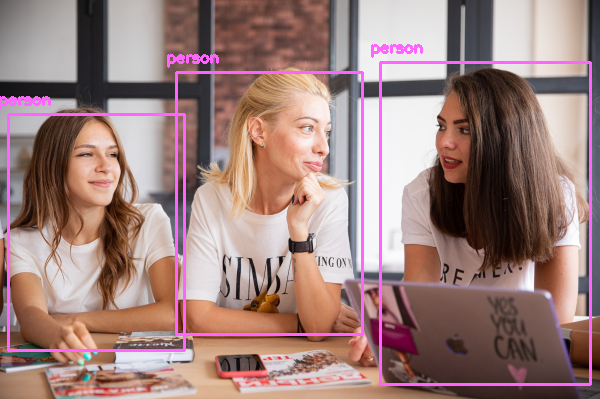

'Людей на фото: 3'

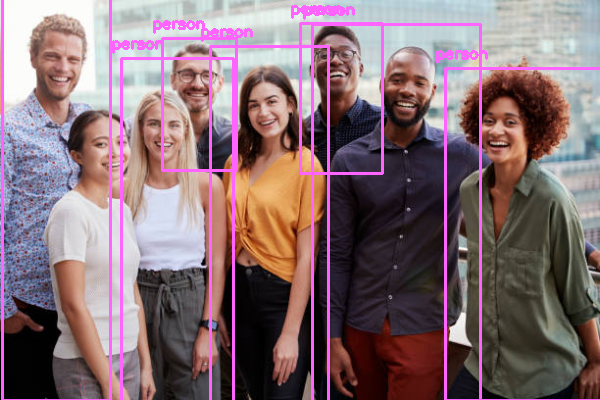

'Людей на фото: 7'

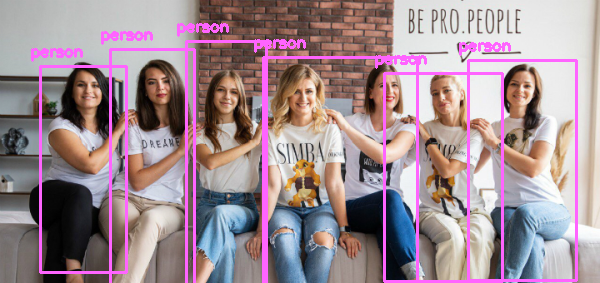

'Людей на фото: 6'

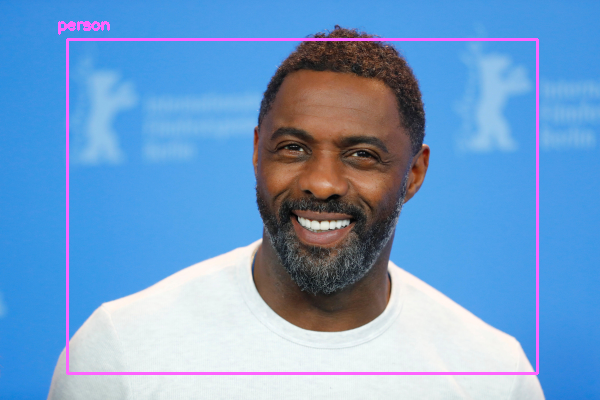

'Людей на фото: 1'

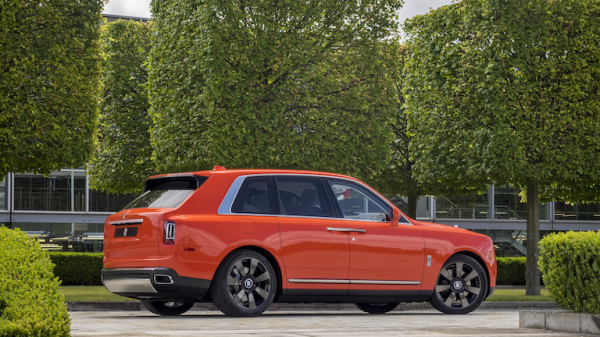

'Людей на фото: 0'

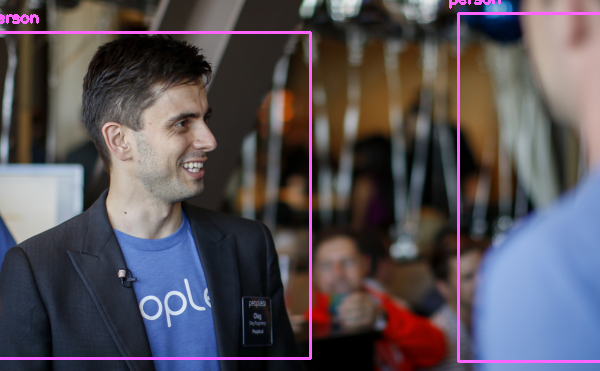

'Людей на фото: 2'

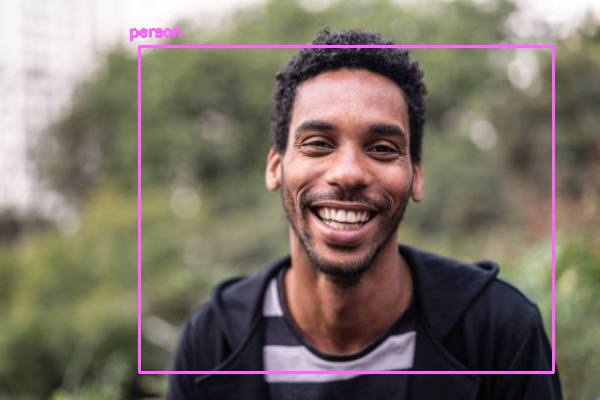

'Людей на фото: 1'

In [33]:
import numpy as np
import glob
import imutils

images = glob.glob('./people_images/*.*')

for image in images:
  img = cv2.imread(image);
  img = imutils.resize(img, width=600)
  recognise_humans(img)

# TASK 3: HUMANS + FACES

In [19]:
import urllib.request

face_cascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"
face_cascade_fname = 'face_cascade.xml'
urllib.request.urlretrieve(face_cascade_url, face_cascade_fname)

landmarks_model_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"
landmarks_model_fname = 'landmarks_cascade.yaml'
urllib.request.urlretrieve(landmarks_model_url, landmarks_model_fname)


('landmarks_cascade.yaml', <http.client.HTTPMessage at 0x7f9c1c0e8a50>)

In [20]:
import cv2
faces_detector = cv2.CascadeClassifier(face_cascade_fname)
landmarks_detector = cv2.face.createFacemarkLBF()
landmarks_detector.loadModel(landmarks_model_fname)

def detect_faces(gray_img):
    faces = faces_detector.detectMultiScale(gray_img)
    return faces

def detect_landmarks(gray_img, faces):
    _, landmarks = landmarks_detector.fit(gray_img, faces)
    return landmarks

from matplotlib import pyplot as plt

def show_img(img, figsize=None):
    if figsize is not None:
        plt.figure(figsize=figsize) 
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')

In [24]:

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.5  
color = (255, 255, 0)
thickness = 2

In [31]:
def recognise_humans_and_faces(image):
  net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))
  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  outs = net.forward(output_layers)
  class_ids = []
  confidences = []
  boxes = []
  Width = image.shape[1]
  Height = image.shape[0]
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.1:
              center_x = int(detection[0] * Width)
              center_y = int(detection[1] * Height)
              w = int(detection[2] * Width)
              h = int(detection[3] * Height)
              x = center_x - w / 2
              y = center_y - h / 2
              class_ids.append(class_id)
              confidences.append(float(confidence))
              boxes.append([x, y, w, h])
  indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.2)
  image_to_show = image.copy();
  human_count = 0
  #check if is people detection
  for i in indices:
      i = i[0]
      box = boxes[i]
      if class_ids[i]==0:
          label = str(classes[class_id])
          human_count+=1
          cv2.rectangle(image_to_show, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (255, 100, 255), 2)
          cv2.putText(image_to_show, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 100, 255), 2)
  # plt.imshow(image)
  # image_to_show = cv2.cvtColor(image_to_show, cv2.COLOR_RGB2BGR)
  gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  faces = detect_faces(gray_img)
  face_count = 0;
  for face in faces:
      x1, y1, w, d = face
      x2, y2 = x1 + w, y1 + d
      cv2.rectangle(image_to_show, (x1, y1), (x2, y2), (0, 255, 100), thickness=2)
      face_count +=1;

  
  # решил добавить сразу на изображение текст
  cv2.putText(image_to_show, "Faces: " + str(face_count), (10,50), font, fontScale, color, thickness=2)
  # images_to_show.append(img_to_show);
  # вывожу результат еще раз)
  
  # использую функцию cv2_imshow так как наша выводит только 1 последнее изображение, так как мы через matplot это делаем
  cv2_imshow(image_to_show)
  display("Лиц на фото: " + str(face_count))
  display("Тел на фото: " + str(human_count))
  display("Найдено людей на фото: " + str(max(human_count,face_count)))

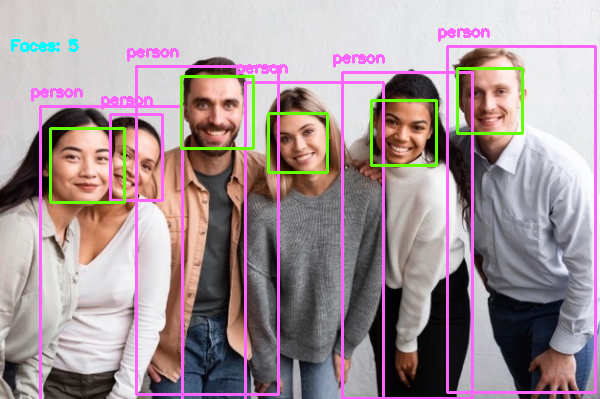

'Лиц на фото: 5'

'Тел на фото: 6'

'Найдено людей на фото: 6'

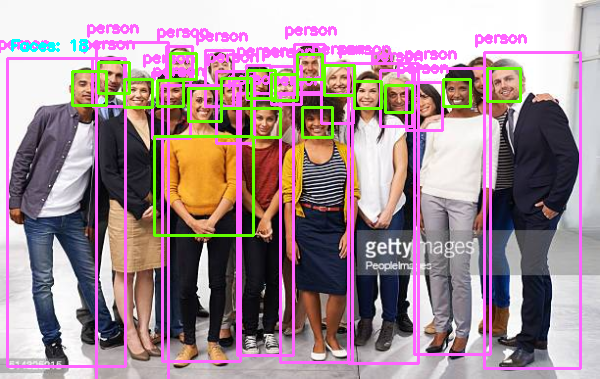

'Лиц на фото: 18'

'Тел на фото: 19'

'Найдено людей на фото: 19'

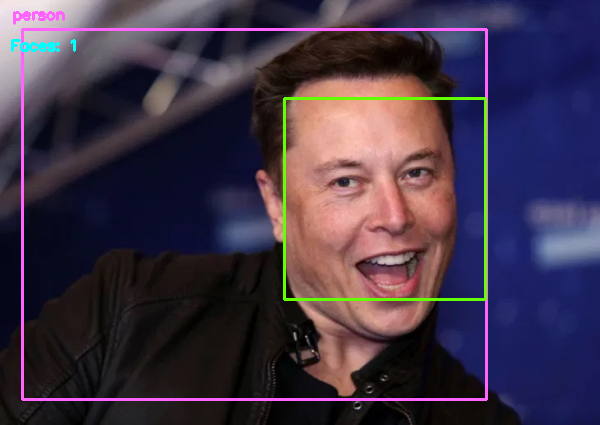

'Лиц на фото: 1'

'Тел на фото: 1'

'Найдено людей на фото: 1'

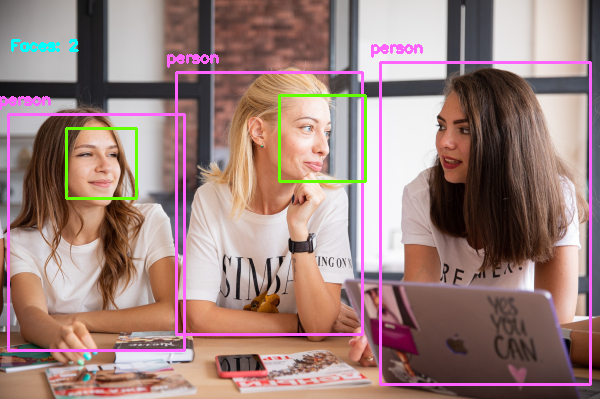

'Лиц на фото: 2'

'Тел на фото: 3'

'Найдено людей на фото: 3'

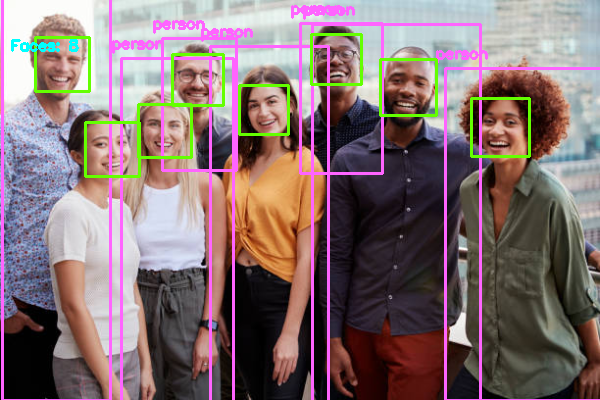

'Лиц на фото: 8'

'Тел на фото: 7'

'Найдено людей на фото: 8'

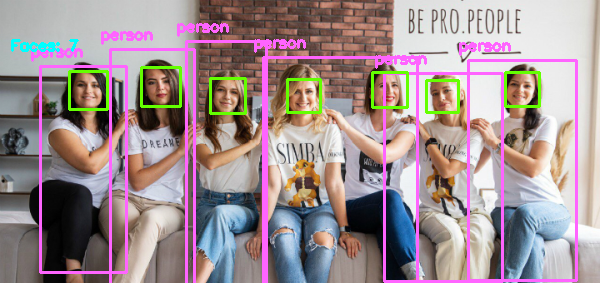

'Лиц на фото: 7'

'Тел на фото: 6'

'Найдено людей на фото: 7'

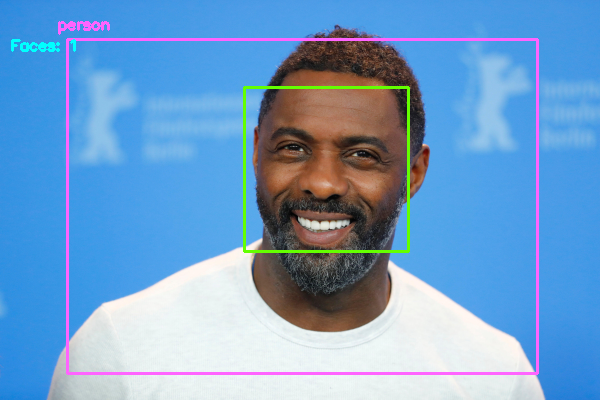

'Лиц на фото: 1'

'Тел на фото: 1'

'Найдено людей на фото: 1'

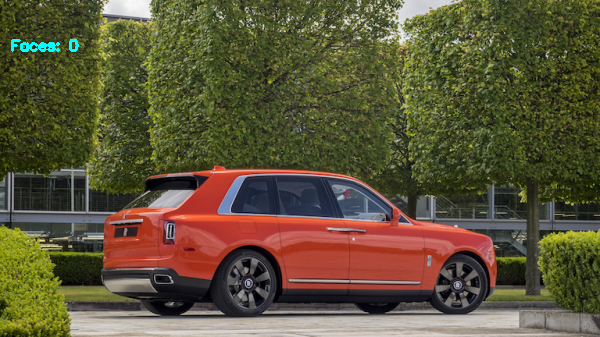

'Лиц на фото: 0'

'Тел на фото: 0'

'Найдено людей на фото: 0'

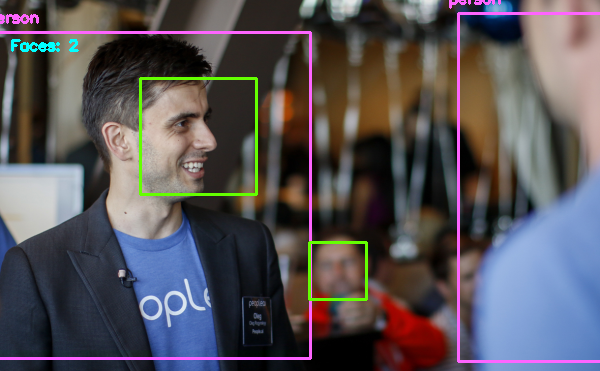

'Лиц на фото: 2'

'Тел на фото: 2'

'Найдено людей на фото: 2'

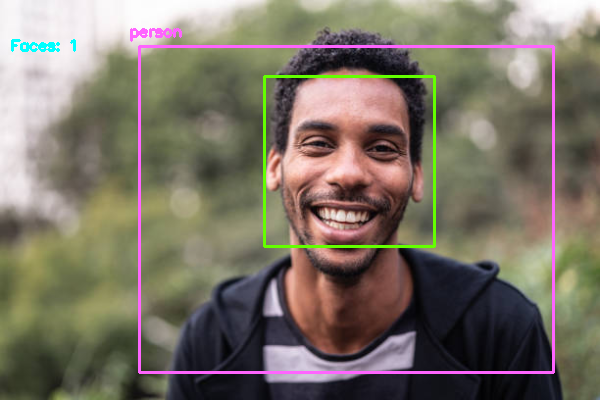

'Лиц на фото: 1'

'Тел на фото: 1'

'Найдено людей на фото: 1'

In [32]:
import numpy as np
import glob
import imutils

images = glob.glob('./people_images/*.*')

for image in images:
  img = cv2.imread(image);
  img = imutils.resize(img, width=600)
  recognise_humans_and_faces(img)